In [1]:
%matplotlib inline


# Plotting Regresssion Forest Error Bars


This example demonstrates using `forestci` to calculate the error bars of
the predictions of a :class:`sklearn.ensemble.RandomForestRegressor` object.

The data used here are a classical machine learning data-set, describing
various features of different cars, and their MPG.



/home2/miranov/.virtualenvs/our_new_env/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home2/miranov/.virtualenvs/our_new_env/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


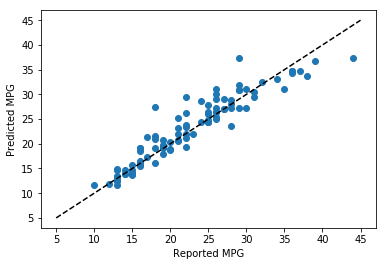

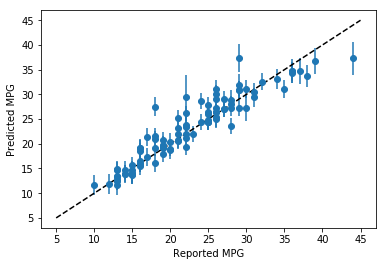

In [2]:
# Regression Forest Example
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection as xval
from sklearn.datasets.mldata import fetch_mldata
import forestci as fci

# retreive mpg data from machine learning library
mpg_data = fetch_mldata('mpg')

# separate mpg data into predictors and outcome variable
mpg_X = mpg_data["data"]
mpg_y = mpg_data["target"]

# split mpg data into training and test set
mpg_X_train, mpg_X_test, mpg_y_train, mpg_y_test = xval.train_test_split(
                                                   mpg_X, mpg_y,
                                                   test_size=0.25,
                                                   random_state=42
                                                   )

# create RandomForestRegressor
n_trees = 2000
mpg_forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
mpg_forest.fit(mpg_X_train, mpg_y_train)
mpg_y_hat = mpg_forest.predict(mpg_X_test)

# Plot predicted MPG without error bars
plt.scatter(mpg_y_test, mpg_y_hat)
plt.plot([5, 45], [5, 45], 'k--')
plt.xlabel('Reported MPG')
plt.ylabel('Predicted MPG')
plt.show()

# Calculate the variance:
mpg_V_IJ_unbiased = fci.random_forest_error(mpg_forest, mpg_X_train,
                                            mpg_X_test)

# Plot error bars for predicted MPG using unbiased variance
plt.errorbar(mpg_y_test, mpg_y_hat, yerr=np.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([5, 45], [5, 45], 'k--')
plt.xlabel('Reported MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [3]:
mpg_X_test.shape

(98, 7)

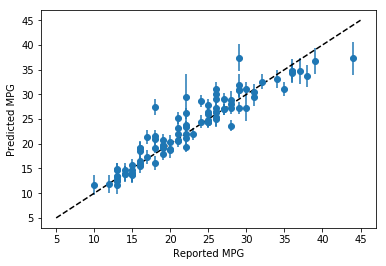

In [4]:
mpg_V_IJ_unbiased = fci.random_forest_error(mpg_forest, mpg_X_train,
                                            mpg_X_test)
plt.errorbar(mpg_y_test, mpg_y_hat, yerr=np.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([5, 45], [5, 45], 'k--')
plt.xlabel('Reported MPG')
plt.ylabel('Predicted MPG')
plt.show()